
## 5 th analisis 
### PARA: 
  `Distribución Energía-> Outliers + Distribucion Normal`
===================================================================

# ANALISIS DE DATOS DE NANOPARTICULAS DE ORO
### EDA
#### Autora: Josefina Cresta

### Importación de librerias

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
#plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Importación de base de datos
`y guardada de df vip`

In [80]:
data_original = pd.read_csv("Au_nanoparticle_dataset.csv")

In [87]:
cols=['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume', 'R_avg','Avg_total', 'Avg_bulk', 'Avg_surf', 'N_bonds', 'Avg_bonds',  'Total_E', 'Formation_E']
data= data_original.loc[:,cols]
data
data.head(4)

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_avg,Avg_total,Avg_bulk,Avg_surf,N_bonds,Avg_bonds,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,17.3706,11.1770,12.5552,8.7880,8936,2.92220,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,17.6061,11.0719,12.4952,8.6513,9090,2.92505,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,25.3692,11.3862,12.3902,8.7303,26399,2.92120,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,29.7011,11.3198,12.3027,8.5778,40689,2.91181,-26937.2010,1171.7890


In [88]:
#Lista de variables locales
cols=['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume', 'R_avg','Avg_total', 'Avg_bulk', 'Avg_surf', 'N_bonds', 'Avg_bonds', 'Total_E', 'Formation_E']

#Diccionario de traduccioón
traduccion={"ID":           "ID",
            "T":            "Temp",
            "tau":          "Crecimiento", 
            "time":         "Tiempo", 
            "N_total":      "N_total",
            "N_bulk":       "N_bulk",
            "N_surface":    "N_super", 
            "Volume":       "Volumen",
            "R_avg":        "Radio",
            "Avg_total":    "Coord_total",
            "Avg_bulk":     "Coord_bulk",
            "Avg_surf":     "Coord_super",
            "N_bonds":      "N_enlaces",
            "Avg_bonds":    "Long_enlaces",
            "Total_E":      "Total_E",
            "Formation_E":  "Energia_Forma",
}

In [89]:
data = data[cols].rename(columns=traduccion)

In [90]:
data["E_atomo"]=data.Total_E/data.N_total


In [91]:
cols=['FCC','HCP', 'ICOS','DECA']
data_add= data_original.loc[:,cols]
data = pd.concat([data,data_add], axis=1)


In [92]:
data.sample(6)

,ID,Temp,Crecimiento,Tiempo,N_total,N_bulk,N_super,Volumen,Radio,Coord_total,...,Coord_super,N_enlaces,Long_enlaces,Total_E,Energia_Forma,E_atomo,FCC,HCP,ICOS,DECA
705,706,323,0.000000,10,4495,2934,1561,7.610000e-26,27.3728,10.9437,...,8.7687,24596,2.88509,-16669.9860,905.4640,-3.708562,2590,17,0,0
436,437,323,0.000000,10,1228,766,462,2.080000e-26,15.8463,10.6759,...,8.4026,6555,2.87741,-4512.1914,289.2886,-3.674423,514,194,0,11
2940,2941,773,0.000125,1,1088,641,447,1.840000e-26,15.3236,10.4982,...,8.2953,5711,2.93509,-3869.9724,384.1076,-3.556960,0,0,0,1
1992,1993,573,0.000250,3,808,438,370,1.370000e-26,13.8432,10.6782,...,8.4838,4314,2.92924,-2910.6955,248.5845,-3.602346,10,7,0,0
3699,3700,923,0.000000,10,3999,2913,1086,6.770000e-26,24.3290,11.1623,...,8.4972,22319,2.93973,-14175.9980,1460.0920,-3.544886,586,62,0,0
3776,3777,923,0.000000,10,10095,7898,2197,1.710000e-25,33.8354,11.4415,...,8.8275,57751,2.94096,-36205.8100,3265.6400,-3.586509,2380,2,0,0


In [99]:
data.loc[:,['FCC', 'HCP', 'ICOS', 'DECA']].index()

,FCC,HCP,ICOS,DECA
0,24,23,2,8
1,30,35,1,7
2,700,376,0,17
3,1858,823,0,11
4,3575,1350,0,28
...,...,...,...,...
3995,0,0,0,0
3996,0,0,0,0
3997,0,0,0,0
3998,1,1,0,1


In [108]:
config = data.apply(lambda row: row['FCC']+row['HCP']+row['ICOS']+row['DECA'], axis=1)
config

0         57.0
1         73.0
2       1093.0
3       2692.0
4       4953.0
         ...  
3995       0.0
3996       0.0
3997       0.0
3998       3.0
3999       0.0
Length: 4000, dtype: float64

In [109]:
data["Estructuras"]=config

In [110]:
data.columns


Index(['ID', 'Temp', 'Crecimiento', 'Tiempo', 'N_total', 'N_bulk', 'N_super',
       'Volumen', 'Radio', 'Coord_total', 'Coord_bulk', 'Coord_super',
       'N_enlaces', 'Long_enlaces', 'Total_E', 'Energia_Forma', 'E_atomo',
       'FCC', 'HCP', 'ICOS', 'DECA', 'Estructuras'],
      dtype='object')

In [111]:
data

,ID,Temp,Crecimiento,Tiempo,N_total,N_bulk,N_super,Volumen,Radio,Coord_total,...,N_enlaces,Long_enlaces,Total_E,Energia_Forma,E_atomo,FCC,HCP,ICOS,DECA,Estructuras
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,17.3706,11.1770,...,8936,2.92220,-5908.6345,343.4555,-3.695206,24,23,2,8,57.0
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,17.6061,11.0719,...,9090,2.92505,-6035.4034,384.8166,-3.675642,30,35,1,7,73.0
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,25.3692,11.3862,...,26399,2.92120,-17330.1660,800.5040,-3.737366,700,376,0,17,1093.0
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,29.7011,11.3198,...,40689,2.91181,-26937.2010,1171.7890,-3.747003,1858,823,0,11,2692.0
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,34.2831,11.3851,...,62641,2.91042,-41427.9010,1597.7390,-3.764804,3575,1350,0,28,4953.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,973,0.000250,6,1509,950,559,2.550000e-26,17.4079,10.5010,...,7923,2.94491,-5346.9589,553.2311,-3.543379,0,0,0,0,0.0
3996,3997,973,0.000250,7,2315,1469,846,3.920000e-26,21.2937,10.5114,...,12167,2.94709,-8218.1252,833.5248,-3.549946,0,0,0,0,0.0
3997,3998,973,0.000250,8,2764,1905,859,4.680000e-26,21.4990,10.7127,...,14805,2.95349,-9876.2899,930.9501,-3.573187,0,0,0,0,0.0
3998,3999,973,0.000250,9,3148,2199,949,5.330000e-26,22.5111,10.7497,...,16920,2.95409,-11261.0810,1047.5990,-3.577218,1,1,0,1,3.0


In [112]:
data.dtypes

ID                 int64
Temp               int64
Crecimiento      float64
Tiempo             int64
N_total            int64
N_bulk             int64
N_super            int64
Volumen          float64
Radio            float64
Coord_total      float64
Coord_bulk       float64
Coord_super      float64
N_enlaces          int64
Long_enlaces     float64
Total_E          float64
Energia_Forma    float64
E_atomo          float64
FCC                int64
HCP                int64
ICOS               int64
DECA               int64
Estructuras      float64
dtype: object

In [113]:
data.to_csv("./Au_Nano_principal.csv", index=False)

# Analisis de la distirbución de energia

Analicemos la funcion densidad de probabilidad de a energía. Que como vimos en el IPYNB 6 no sigue una distribución normal.

In [ ]:
data

,ID,Temp,Crecimiento,Tiempo,N_total,N_bulk,N_super,Volumen,Radio,Coord_all,Coord_bulk,Coord_super,N_enlaces,Long_enlaces,Total_E,Energia_Forma
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,17.3706,11.1770,12.5552,8.7880,8936,2.92220,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,17.6061,11.0719,12.4952,8.6513,9090,2.92505,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,25.3692,11.3862,12.3902,8.7303,26399,2.92120,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,29.7011,11.3198,12.3027,8.5778,40689,2.91181,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,34.2831,11.3851,12.2159,8.5533,62641,2.91042,-41427.9010,1597.7390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,973,0.000250,6,1509,950,559,2.550000e-26,17.4079,10.5010,11.8126,8.2719,7923,2.94491,-5346.9589,553.2311
3996,3997,973,0.000250,7,2315,1469,846,3.920000e-26,21.2937,10.5114,11.7971,8.2790,12167,2.94709,-8218.1252,833.5248
3997,3998,973,0.000250,8,2764,1905,859,4.680000e-26,21.4990,10.7127,11.7948,8.3132,14805,2.95349,-9876.2899,930.9501
3998,3999,973,0.000250,9,3148,2199,949,5.330000e-26,22.5111,10.7497,11.8058,8.3024,16920,2.95409,-11261.0810,1047.5990


### Energía total

In [ ]:
energias = data.loc[:, ['ID','Total_E']]

In [ ]:
energias

,ID,Total_E
0,1,-5908.6345
1,2,-6035.4034
2,3,-17330.1660
3,4,-26937.2010
4,5,-41427.9010
...,...,...
3995,3996,-5346.9589
3996,3997,-8218.1252
3997,3998,-9876.2899
3998,3999,-11261.0810


In [ ]:
energias['N_total']=data.N_total

In [ ]:
energias['E_atomo']=energias.Total_E/energias.N_total


In [ ]:
energias

,ID,Total_E,N_total,E_atomo
0,1,-5908.6345,1599,-3.695206
1,2,-6035.4034,1642,-3.675642
2,3,-17330.1660,4637,-3.737366
3,4,-26937.2010,7189,-3.747003
4,5,-41427.9010,11004,-3.764804
...,...,...,...,...
3995,3996,-5346.9589,1509,-3.543379
3996,3997,-8218.1252,2315,-3.549946
3997,3998,-9876.2899,2764,-3.573187
3998,3999,-11261.0810,3148,-3.577218


Preguntas para elegir que distribución utilizar para analisis de <span style="color:green">Energía por Átomo</span>:

    1)  Es continua? -> Sí
    2)  Es simétrica? -> Sí (ver analisis simetria IPYNB 6)
    3)  Esta la data alrededor de cierto valor? -> Sí
    4)  Como son los <span style="color:red">OUTLIERS<span>? -> ??
  <span style="color:red">OUTLIERS<span>

# Outliers 
Un primer y útil paso para detectar valores atípicos univariados es la visualización de la distribución de las variables. Por lo general, cuando se realiza una EDA, esto debe hacerse individualmente para todas las variables interesantes de un conjunto de datos. Una manera fácil de resumir visualmente la distribución de una variable es el diagrama de caja.

En un diagrama de caja, introducido por John Tukey en 1970, los datos se dividen en cuartiles. Por lo general, muestra una caja rectangular que representa el 25%-75% de las observaciones de una muestra, extendida por los llamados bigotes que alcanzan la entrada de datos mínima y máxima. Las observaciones que se muestran fuera de los bigotes son valores atípicos.

## Outliers de Energia y Energia por atomo

Trabajando ocn la energia por atomo

Text(0.5, 0, 'Energía por átomo')

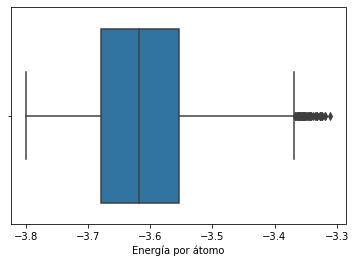

In [ ]:
ax = sns.boxplot(x=(energias['E_atomo']))
ax.set_xlabel('Energía por átomo')

Los diagramas de caja son excelentes para resumir y visualizar la distribución de variables de manera fácil y rápida. Sin embargo, no identifican los índices reales de las observaciones periféricas.
Se defini función para identificar los indices de los outliers, Para su posterior tratamiento

In [ ]:
def outliers(df):
    """
    Función que cuenta el número de outliers de un dataframe y devuelve un dataframe con los outliers

    Parameters
    ----------
    df : dataframe

    Returns
    -------
    df : dataframe con el número de outliers por columna
    """

    outliers = 0
    df_out = pd.DataFrame()
    df_num = df.select_dtypes(exclude=['object'])
    
    for col in df_num.columns:
        q1 = df_num[col].quantile(0.25)
        q3 = df_num[col].quantile(0.75)
        
        ri = q3 - q1
        
        minimo = q1 - (ri * 1.5)
        maximo = q3 + (ri * 1.5)
        
        outliers = df_num[(df_num[col] < minimo) | (df_num[col] > maximo)].shape[0]
        df_out[col] = [outliers]

    return df_out

In [ ]:
outliers(energias)

,ID,Total_E,N_total,E_atomo
0,0,425,431,49


`medium `

Veamos un ejemplo. El siguiente gráfico muestra la mayoría de las variables incluidas en el conjunto de datos de vivienda de Boston. Para recibir una descripción general rápida de las distribuciones de todas las variables, puede usar una gráfica de grupo. Tenga en cuenta que las variables pueden diferir en escala, y agregar todas las variables en una cuadrícula puede generar algunos gráficos difíciles de leer. Ejecuté df.describe() primero para tener una idea de la escala de cada variable y luego creé tres diagramas de grupo para tres grupos de variables diferentes. Aquí hay un ejemplo de variables de escala media:

En nuestro caso, podemos visualizar las variables y en esa “cajita” veremos donde se concentra el 50 por ciento de nuestra distribución (percentiles 25 a 75), los valores mínimos y máximos (las rayas en “T”) y -por supuesto- los outliers, esos “valores extraños” y alejados.



Técnicas para la detección y eliminación de valores atípicos:
👉 Tratamiento de puntuación Z:

Suposición: las características tienen una distribución normal o aproximadamente normal.


In [ ]:
# Finding the IQR
percentile25 = energias.E_atomo.quantile(0.25)
percentile75 = energias.E_atomo.quantile(0.75)
print(percentile75, percentile25)

-3.5541895977432167 -3.6788399297054024


In [ ]:
#Finding upper and lower limit
iqr=percentile75-percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit, lower_limit)

-3.3672140997999382 -3.865815427648681


In [ ]:
#Finding Outliers

print(energias[energias['E_atomo'] > upper_limit]["N_total"].min())
print(energias[energias['E_atomo'] > upper_limit]["N_total"].max())
print(len(energias[energias['E_atomo'] > upper_limit]["N_total"]))

print(energias[energias['E_atomo'] < lower_limit]["N_total"].min())
print(energias[energias['E_atomo'] < lower_limit]["N_total"].max())
print(len(energias[energias['E_atomo'] < lower_limit]["N_total"]))


236
460
49
nan
nan
0


Interesante que no hay Outliers por debajo del limite inferior. Pero si unas 50 energias por encima del limite superior. Como representa un 1.25% de la muestra total los eliminamos. 
Es interesante notar que es para una cantidad de atomos entre 236 y 460 átomos. 
Me voy a fijar si queda alguna estructura en ese rango. Sino algo fisico debe pasar con esas cantidades. 
🟣Por ahora)(Luego con la energia media muestral la multiplicaria por la cantidad de atomos en cada una y le imputaria de esa forma la energia a estos outliers)

¿Cómo tratar los valores atípicos?

👉 Trimming: Excluye los valores atípicos de nuestro análisis. Al aplicar esta técnica, nuestros datos se adelgazan cuando hay más valores atípicos presentes en el conjunto de datos. Su principal ventaja es su naturaleza más rápida.

👉Capping: en esta técnica, limitamos nuestros datos de valores atípicos y establecemos el límite, es decir, por encima de un valor particular o por debajo de ese valor, todos los valores se considerarán como valores atípicos, y la cantidad de valores atípicos en el conjunto de datos proporciona ese límite. número.

Por ejemplo, si está trabajando en la característica de ingresos, puede encontrar que las personas por encima de cierto nivel de ingresos se comportan de la misma manera que aquellas con ingresos más bajos. En este caso, puede limitar el valor de los ingresos a un nivel que lo mantenga intacto y tratar los valores atípicos en consecuencia.

👉 IQR based filtering :

Used when our data distribution is skewed.

In [ ]:
new_energias = energias[energias['E_atomo'] < upper_limit]
new_energias

,ID,Total_E,N_total,E_atomo
0,1,-5908.6345,1599,-3.695206
1,2,-6035.4034,1642,-3.675642
2,3,-17330.1660,4637,-3.737366
3,4,-26937.2010,7189,-3.747003
4,5,-41427.9010,11004,-3.764804
...,...,...,...,...
3995,3996,-5346.9589,1509,-3.543379
3996,3997,-8218.1252,2315,-3.549946
3997,3998,-9876.2899,2764,-3.573187
3998,3999,-11261.0810,3148,-3.577218


y vemos que quedan estructuras en ese rango. Osea que quitamos los outliers sin problemas

In [ ]:
new_energias.loc[(new_energias['N_total']>236)  & (new_energias['N_total']<460), :]

,ID,Total_E,N_total,E_atomo
90,91,-1252.6011,361,-3.469809
91,92,-1279.9390,364,-3.516316
170,171,-1401.3113,395,-3.547624
171,172,-1427.9532,400,-3.569883
190,191,-1291.3030,363,-3.557309
...,...,...,...,...
3891,3892,-1464.0629,422,-3.469343
3970,3971,-1452.9767,422,-3.443073
3971,3972,-1476.0225,428,-3.448651
3990,3991,-1374.0525,398,-3.452393


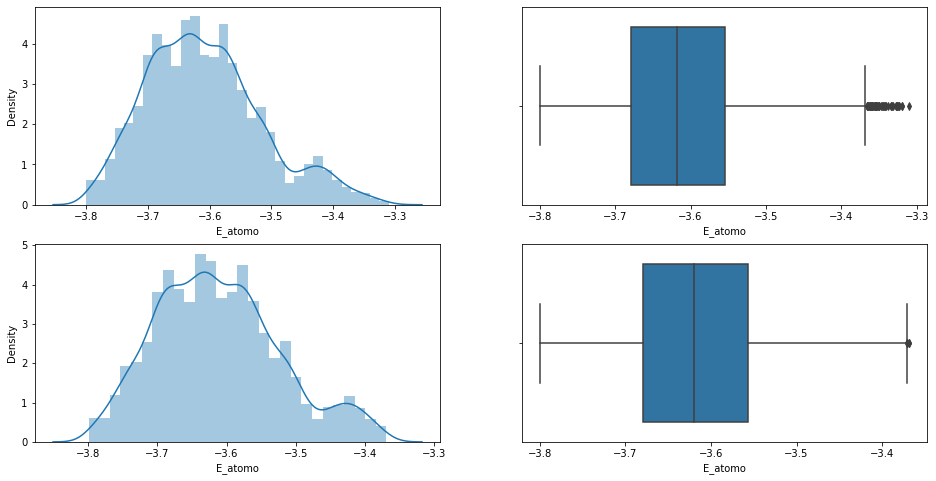

In [ ]:
#Compare the plots after trimming

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(energias['E_atomo'])
plt.subplot(2,2,2)
sns.boxplot(energias['E_atomo'])
plt.subplot(2,2,3)
sns.distplot(new_energias['E_atomo'])
plt.subplot(2,2,4)
sns.boxplot(new_energias['E_atomo'])
plt.show()

In [ ]:
#Capping

new_energias_cap = energias.copy()
new_energias_cap['E_atomo'] = np.where(
    new_energias_cap['E_atomo'] > upper_limit,
    upper_limit,
    np.where(
        new_energias_cap['E_atomo'] < lower_limit,
        lower_limit,
        new_energias_cap['E_atomo']
    )
)

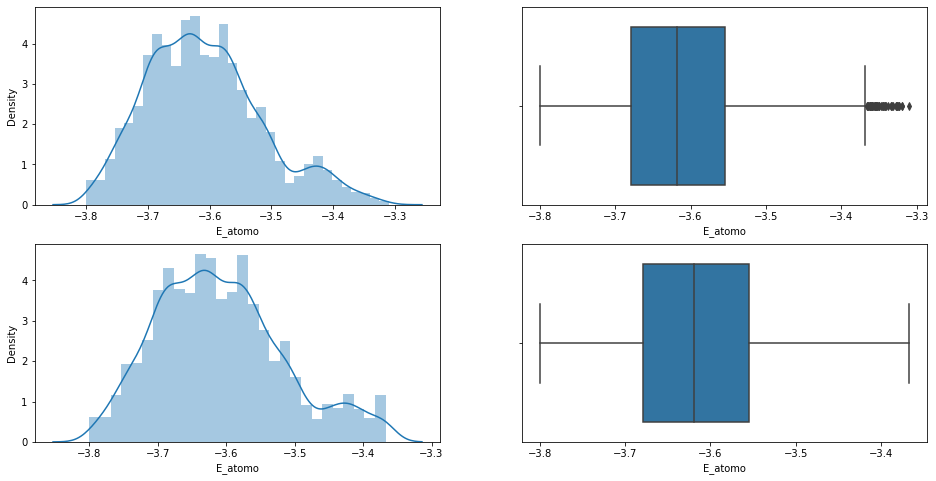

In [ ]:
#Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(energias['E_atomo'])
plt.subplot(2,2,2)
sns.boxplot(energias['E_atomo'])
plt.subplot(2,2,3)
sns.distplot(new_energias_cap['E_atomo'])
plt.subplot(2,2,4)
sns.boxplot(new_energias_cap['E_atomo'])
plt.show()

🟣👉 Discretización: En esta técnica, al hacer los grupos incluimos los valores atípicos en un grupo en particular y los obligamos a comportarse de la misma manera que los de otros puntos de ese grupo. Esta técnica también se conoce como Binning.
https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

# Analisis Distribucion normal

Estimaciones de ubicación
Un paso fundamental en la exploración de un conjunto de datos es obtener un valor resumido para cada característica o variable. Esta es comúnmente una estimación de dónde se encuentran la mayoría de los datos, o en otras palabras, la tendencia central.

Al principio, resumir los datos puede sonar pan comido: simplemente tome la media de los datos. En realidad, aunque la media es muy fácil de calcular y usar, puede que no siempre sea la mejor medida para el valor central.

Para resolver este problema, los estadísticos han desarrollado estimaciones alternativas a la media.

**Mean**
La suma de todos los valores dividida por el número de valores, también conocido como el promedio

Aquí se explica cómo calcular la media de la variable Edad:

**Media ponderada**
La suma de todos los valores multiplicada por un peso dividida por la suma de los pesos. Esto también se conoce como el promedio ponderado.

Aquí hay dos motivaciones principales para usar una media ponderada:

Algunas observaciones son intrínsecamente más variables (desviación estándar alta) que otras, y las observaciones altamente variables reciben un peso más bajo.
Los datos recopilados no representan por igual a los diferentes grupos que nos interesa medir.


**Mediana**
El valor que separa una mitad de los datos de la otra, dividiéndola así en una mitad superior y otra inferior. Esto también se llama el percentil 50.



### Estimaciones de Variabilidad

Además de la ubicación, tenemos otro método para resumir una característica. La variabilidad, también conocida como dispersión, nos dice qué tan dispersos o agrupados están los datos.

Cálculo de las medidas de variabilidad para el mismo marco de datos utilizando bibliotecas como pandas, numpy y scipy.

**Desviaciones**
La diferencia entre los valores observados y la estimación de ubicación. Las desviaciones a veces se denominan errores o residuales.

**Varianza**
La suma de las desviaciones al cuadrado de la media dividida por n — 1, donde n es el número de valores de datos. Esto también se llama error cuadrático medio.

`df['Age'].var()`

**Standard deviation**
The square root of the variance.

`df['Age'].std()`

##output: 28.148861406903617
Mean absolute deviation
The mean of the absolute values of the deviations from the mean. This is also referred to as the l1-norm or Manhattan norm.

I’ve covered this in more detail along with a mathematical explanation here: Calculating Vector P-Norms — Linear Algebra for Data Science -IV

Median absolute deviation from the median
The median of the absolute values of the deviations from the median.

`df['Age'].mad()`

##output: 24.610885188020433

Habria que fijasrse si la mean median and moden coinciden

In [ ]:
new_energias_cap

,ID,Total_E,N_total,E_atomo
0,1,-5908.6345,1599,-3.695206
1,2,-6035.4034,1642,-3.675642
2,3,-17330.1660,4637,-3.737366
3,4,-26937.2010,7189,-3.747003
4,5,-41427.9010,11004,-3.764804
...,...,...,...,...
3995,3996,-5346.9589,1509,-3.543379
3996,3997,-8218.1252,2315,-3.549946
3997,3998,-9876.2899,2764,-3.573187
3998,3999,-11261.0810,3148,-3.577218


## La prueba de Shapiro-Wilk para la muestra limpia (sin outliers)
Este es es un ejemplo de test de hipótesis para saber si una distribución sigue la forma de otra distribución.

La prueba de Shapiro-Wilk es una prueba bastante buena para comprobar la normalidad de una variable. Se sugiere que la prueba se utilice para muestras de datos pequeñas, miles de observaciones o menos. En caso de tener más observaciones




In [ ]:
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from scipy.stats import shapiro
# Configuro la semilla aleatoria
#seed(1993)
# Genero 100 muestras
#data = randn(100)
# Prueba de Shapiro-Wilk
stat, p = shapiro(new_energias_cap["E_atomo"])
print('Estadisticos=%.3f, p=%.3f' % (stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')

Estadisticos=0.976, p=0.000
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


## Prueba K^2 de D’Agostino
La prueba K^2 de D’Agostino calcula curtosis y asimetría a partir de los datos, para determinar si la distribución de datos se aparta de la distribución normal.


In [ ]:

from numpy.random import seed, randn
import matplotlib.pyplot as plt
from scipy.stats import normaltest

# Test de DAgostino
stat, p = normaltest(new_energias_cap["E_atomo"])
print('Estadisticos=%.3f, p=%.3f' % (stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')

Estadisticos=152.988, p=0.000
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


# Distribuciones muestrales y el teorema del límite central
Hago lo de la distribucion muestral Aplicando el Teorema Central del limte

El teorema del límite central se refiere a una población distribuida arbitrariamente dada. Selecciono aleatoriamente n muestras de estas poblaciones cada vez, un total de m veces. Luego, tome los m grupos de muestras para encontrar el valor promedio respectivamente. La distribución de estos promedios se acerca a una distribución normal.

In [ ]:
E_atomo_muestra=np.array([np.mean(new_energias_cap[new_energias_cap["N_total"]<len(new_energias_cap["N_total"])].sample(100)["E_atomo"].values)for i in range(200)])

In [ ]:
E_atomo_muestra

array([-3.58546647, -3.57116475, -3.57696296, -3.57546369, -3.5826491 ,
       -3.57488455, -3.58062464, -3.56720507, -3.58051451, -3.5852684 ,
       -3.57180716, -3.59089585, -3.57713006, -3.58322399, -3.57173849,
       -3.57560985, -3.57485718, -3.58300028, -3.57637931, -3.57183121,
       -3.57226879, -3.55737322, -3.57588331, -3.58365453, -3.61004313,
       -3.58050166, -3.58305277, -3.56741045, -3.58946252, -3.58262029,
       -3.58839093, -3.57138014, -3.58849685, -3.57503931, -3.57761076,
       -3.58105993, -3.5686649 , -3.57503055, -3.5777486 , -3.59098102,
       -3.58444823, -3.58313012, -3.58862397, -3.59157026, -3.5736313 ,
       -3.57843826, -3.58325849, -3.5696396 , -3.56965463, -3.56989698,
       -3.58423067, -3.58045699, -3.58493749, -3.57543916, -3.56231167,
       -3.57468031, -3.58160416, -3.59144529, -3.5720089 , -3.5687474 ,
       -3.57852368, -3.58217414, -3.57872294, -3.57671619, -3.58088518,
       -3.57995322, -3.58986357, -3.5824831 , -3.58417992, -3.57

<AxesSubplot:ylabel='Density'>

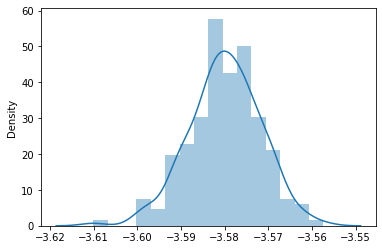

In [ ]:
sns.distplot(E_atomo_muestra)

In [ ]:

from numpy.random import seed, randn
import matplotlib.pyplot as plt
from scipy.stats import normaltest

# Test de DAgostino
stat, p = normaltest(E_atomo_muestra)
print('Estadisticos=%.3f, p=%.3f' % (stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')

Estadisticos=4.275, p=0.118
La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)


esta distribución está basada en medias muestrales, y no en resultados individuales, recibe un nombre especial. Se llama la distribución muestral de la media muestral  $\vec{X}$,   
LA media de $\overline{X}$ es  $\mu_{\overline{X}}$, media de la poblacion formada por todas las medias muestrales. Osea el promedio del promedio de todas las muestras da:

In [ ]:
E_atomo_muestra.mean()

-3.579908054333582

Los valores de cualquier población se desvían de su media. La variabilidad en una población de elementos (X) se mide en desviaciones estándares.  Las medias muestrales varían porque la muestra no abarca a toda la población, sino tan sólo un subconjunto; y como las muestras varían, las medias también.

La variabilidad en la media muestral($\overline{X}$)se mide con el error estandar $\sigma _\overline{X}=\frac{\sigma _x}{\sqrt{n}}$

dondo $\sigma _x$ es la desviacion estandar de la población y n es el tamaño de cada muestra.

La media de esta distribución muestral es 

In [ ]:
mu=E_atomo_muestra.mean()
mu

-3.579908054333582


La varianza de esta distribución muestral es

In [ ]:
sigma_mu=(energias.E_atomo.std())/np.sqrt(100)
sigma_mu

0.009382240203992377

✅ Y logró dar el error con 4 cifras significativas

Distribución del tamaño de las partículas de cobalto, determinada a partir de la transición al estado superparamagnético [5]. Se hicieron dos suposiciones para la distribución del tamaño de partículas: (1) Una distribución normal con los parámetros
 = 5,5 nm y (curva roja) σ = 0,85 nm, similar al asumido por Woods et al. [5] y (2) una distribución extendida como superposición de dos distribuciones normales (curvas verdes) con los parámetros = 5,5 nm y σ1 = 0,7 nm. Teniendo en cuenta la cola extendida de la distribución del tamaño de partícula en el lado de las partículas más grandes, una segunda distribución normal con los parámetros  = 6,6 nm y se introdujo σ2 = 0,9 nm. En ambos casos, los datos experimentales proporcionados por Woods et al. [5] están bien reproducidos. Sin embargo, la suposición de una distribución de tamaño más amplia también se ocupa de las partículas en la cola del lado de las partículas más grandes.

Shapiro-Wilk Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.
Python Code

In [ ]:
energias=data["Total_E"]/data["N_total"]

In [ ]:
energias

0      -3.695206
1      -3.675642
2      -3.737366
3      -3.747003
4      -3.764804
          ...   
3995   -3.543379
3996   -3.549946
3997   -3.573187
3998   -3.577218
3999   -3.578624
Length: 4000, dtype: float64

In [ ]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = energias
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.977, p=0.000
Probably not Gaussian


In [ ]:
new_energiasp=new_energias_cap["Total_E"]/new_energias_cap["N_total"]

In [ ]:

# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat, p = normaltest(new_energiasp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=173.562, p=0.000
Probably not Gaussian


<AxesSubplot:xlabel='E_atomo', ylabel='Count'>

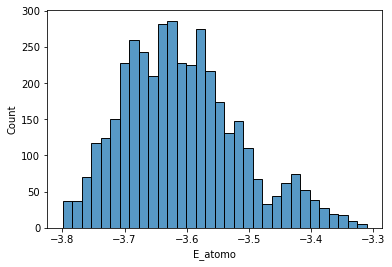

In [117]:
sns.histplot(data["E_atomo"])

In [119]:
energias.loc[energias['E_atomo'] < -3.7]["N_total"])

KeyError: 'E_atomo'

In [120]:
normalrv = ss.norm.rvs(size=10000, random_state=256) # Genera números aleatorios 
cuenta, cajas, ignorar = plt.hist(normalrv, 100)
plt.ylabel('Frecuencia')
plt.xlabel('X')
plt.title('Histograma números aleatorios Normal')
plt.show()

NameError: name 'ss' is not defined

In [121]:
serie = normalrv
col="col"
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = ss.normaltest(serie)
print("D'Agostino's K2 test:")
print(f"\t Estadístico = {k2}, p-value = {p_value}")

alpha=0.05
if p_value <= alpha:
    print(f"P_Valor < 0.05 -> Se rechaza H0 \n\t  No es posible asegurar que {col} sigue una distribución normal.")
else:
    print(f"P_Valor > 0.05 -> Se acepta H0 \n\t   Es posible asegurar que {col} sigue una distribución normal.")
print("*"*80)   

# Histograma + curva normal teórica
# ==============================================================================
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = ss.norm.fit(serie)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(serie), max(serie), num=100)
y_hat = ss.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, color="red", label='normal teórica')
ax.hist(x=serie, density=True, bins=80, color="#3182bd", alpha=0.5)

ax.set_title(f'Distribución de {col}')
ax.set_xlabel(f'{col}')
ax.set_ylabel('Densidad de probabilidad')
ax.legend()
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(serie, fit = True, line="s", color="blue", alpha = 0.4, lw = 2, ax= ax)
ax.set_title(f'Gráfico Q-Q de {col}', fontsize = 10, fontweight = "bold")
ax.tick_params(labelsize = 7)

NameError: name 'normalrv' is not defined